##### Installation

In [1]:
pip install language_check

  Using cached language-check-1.1.tar.gz (33 kB)
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check: started
    Running setup.py install for language-check: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\Python310\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-jb0yhgw3\\language-check_bbd97073224e4b0cb2880e2cbd3bbec4\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-jb0yhgw3\\language-check_bbd97073224e4b0cb2880e2cbd3bbec4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-wifx7tbi'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-jb0yhgw3\language-check_bbd97073224e4b0cb2880e2cbd3bbec4\
  Complete output (4 lines):
  Could not parse Java version from """java version "15.0.1" 2020-10-20
  Java(TM) SE Runtime Environment 

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


##### Importing Modules

In [7]:
import os
import re
import glob
import string
import statistics
import numpy as np 
import pandas as pd 
import textstat
import nltk

In [8]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from tensorflow import keras
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense,Dropout
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
print(os.listdir("./FND Dataset/"))

['fake', 'real']


##### Extracting Data for Processing

In [11]:
df = pd.DataFrame(columns=['text', 'label'])

In [12]:
path="./FND Dataset/"

i = 0
file_list = glob.glob(path+"/fake/*.txt")
for file_name in file_list:
    file = open(file_name,"r", encoding="utf8")
    a = file.read()
    df.loc[i]=[a,1]
    i = i+1

file_list = glob.glob(path+"/real/*.txt")
for file_name in file_list:
    file = open(file_name,"r", encoding="utf8")
    a = file.read()
    df.loc[i]=[a,0]
    i = i+1 

In [13]:
df.head()

,text,label
0,Kim Kardashian Changed Her Password Again Afte...,1
1,‘Bird Box’ Challenge: Man Crashes After Attemp...,1
2,29 Humans Killed in Laboratory\nProducing Mili...,1
3,Bart Simpson elected mayor of LA town\nThe Sim...,1
4,Jaden Smith Says He is a Prophet and God Inspi...,1


In [14]:
df.tail()

,text,label
575,Machine Learning Opens Up New Ways to Help Dis...,0
576,YouTube automates sound effect captions with A...,0
577,Solar-powered 'skin' could make prosthetics mo...,0
578,Uber Self-Driving Car Tests Resume Three Days ...,0
579,Apple's Devices Lose Luster in American Classr...,0


##### Data Pre-processing

In [15]:
tag_dict={
            'J':wordnet.ADJ,
            'V':wordnet.VERB,
            "N": wordnet.NOUN,
            "R": wordnet.ADV
        }

def get_pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return tag_dict.get(tag,wordnet.NOUN)

def clean_text(text):
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)  
     
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", "", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)   
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", "", text)
    text = re.sub(r"\.", "", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", "", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", "", text)
   
    ##Lemmatization
    sentence_clean=[]
    for word in text.split():
        sentence_clean.append(lemmatizer.lemmatize(word,get_pos_tag(word)))
        
    return " ".join(sentence_clean)


# apply the above function to df['text']
lemmatizer = WordNetLemmatizer() 
df['text'] = df['text'].map(lambda x: clean_text(x))

##### Feature Extraction

In [16]:
#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(2, 3))
counts = count_vectorizer.fit_transform(df['text'].values)
tfidf = transformer.fit_transform(counts)

target=df['label'].values.astype('int')
selector = SelectKBest(chi2, k=1000)
selector.fit(tfidf, target)
top_words = selector.get_support().nonzero()

# Pick only the most informative columns in the data.
chi_matrix = tfidf[:,top_words[0]]

In [17]:
# Our list of functions to apply.
transform_functions = [
    
    lambda x: x.count(" ")/len(x.split()),
    lambda x: x.count(".")/len(x.split()),
    lambda x: x.count("!")/len(x.split()),
    lambda x: x.count("?")/len(x.split()),
    lambda x: x.count("-")/len(x.split()),
    lambda x: x.count(",")/len(x.split()),
    lambda x: x.count("$")/len(x.split()),
    lambda x: x.count("(")/len(x.split()),
    lambda x: len(x) / (x.count(" ") + 1),
    lambda x: x.count(" ") / (x.count(".") + 1),
    lambda x: len(re.findall("\d", x)),
    lambda x: len(re.findall("[A-Z]", x)),
    lambda x: textstat.flesch_reading_ease(x),
    lambda x: textstat.smog_index(x),
    lambda x: textstat.flesch_kincaid_grade(x),
    lambda x: textstat.coleman_liau_index(x),
    lambda x: textstat.automated_readability_index(x),
    lambda x: textstat.dale_chall_readability_score(x),
    lambda x: textstat.difficult_words(x),
    lambda x: textstat.linsear_write_formula(x),
    lambda x: textstat.gunning_fog(x),
]

# Apply each function and put the results into a list.
columns = []
for func in transform_functions:
    columns.append(df["text"].apply(func))

##### Train-Test Split

In [18]:
## Convert the meta features to a numpy array.
meta = np.asarray(columns).T
features = np.hstack([ meta,chi_matrix.todense()])
targets = df['label'].values
print('Features-shape: ',features.shape)
print('Target-shape: ',target.shape)

Features-shape:  (580, 1021)
Target-shape:  (580,)


In [19]:
x, x_test, y, y_test = train_test_split(features, targets, test_size=0.25, random_state=0)
x_test = x_test.astype('int')
y_test = y_test.astype('int')
print(x_test.shape,y_test.shape)
print(x.shape)

(145, 1021) (145,)
(435, 1021)


In [20]:
skf = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)
y = y.astype('int')

##### Passive Aggressive Classifier

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [22]:
PACmodel = PassiveAggressiveClassifier(max_iter=50)
PACscore = []

for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        PACmodel.fit(X_train, y_train)

        confidence = PACmodel.score(X_test, y_test)
        PACscore.append(confidence) 

print(PACscore)
print(f'Accuracy: {round(statistics.mean(PACscore)*100,2)}%')

[0.4827586206896552, 0.4942528735632184, 0.5057471264367817, 0.5057471264367817, 0.4827586206896552]
Accuracy: 49.43%


##### Multinomial NB Classifier 

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler 

In [24]:
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)
x1_test = scaler.transform(x_test)

In [25]:
MNBmodel = MultinomialNB()
MNBscore = []

for train_index, val_index in skf.split(x1,y):
        X_train, X_test = x1[train_index], x1[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        MNBmodel.fit(X_train, y_train)

        confidence = MNBmodel.score(X_test, y_test)
        MNBscore.append(confidence) 

print(MNBscore)
print(f'Accuracy: {round(statistics.mean(MNBscore)*100,2)}%')

[0.6896551724137931, 0.6896551724137931, 0.735632183908046, 0.6551724137931034, 0.6551724137931034]
Accuracy: 68.51%


##### Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
Const = [1e0,1e-1,1e-2,1e-3]

for C in Const:
    LRmodel = LogisticRegression(C=C, solver='liblinear')
    LRscore = []

    for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]  
        LRmodel.fit(X_train, y_train)

        confidence = LRmodel.score(X_test, y_test)
        LRscore.append(confidence) 

    print(LRscore)
    print('C: ',C,end=' ')
    print(f'Accuracy: {round(statistics.mean(LRscore)*100,2)}%')

[0.7011494252873564, 0.7471264367816092, 0.7586206896551724, 0.7701149425287356, 0.6781609195402298]
C:  1.0 Accuracy: 73.1%
[0.7011494252873564, 0.7241379310344828, 0.7471264367816092, 0.7586206896551724, 0.6436781609195402]
C:  0.1 Accuracy: 71.49%
[0.6896551724137931, 0.7586206896551724, 0.735632183908046, 0.7816091954022989, 0.6436781609195402]
C:  0.01 Accuracy: 72.18%
[0.7011494252873564, 0.7471264367816092, 0.7471264367816092, 0.7816091954022989, 0.6436781609195402]
C:  0.001 Accuracy: 72.41%


##### SVM

In [28]:
from sklearn.svm import SVC

In [29]:
SVMmodel = SVC(gamma='auto')
SVMscore = []

for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        SVMmodel.fit(X_train, y_train)

        confidence = SVMmodel.score(X_test, y_test)
        SVMscore.append(confidence) 

print(SVMscore)
print(f'Accuracy: {round(statistics.mean(SVMscore)*100,2)}%')

[0.5632183908045977, 0.6206896551724138, 0.6781609195402298, 0.6666666666666666, 0.6551724137931034]
Accuracy: 63.68%


##### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
min_imp = [1e-5]

for imp in min_imp:
    DTmodel = DecisionTreeClassifier(criterion='gini', splitter='best', min_impurity_decrease=imp)
    DTscore = []

    for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        DTmodel.fit(X_train, y_train)

        confidence = DTmodel.score(X_test, y_test)
        DTscore.append(confidence)  

    print(DTscore)
    print('Impurity ',imp,end=' ')
    print(f'Accuracy: {round(statistics.mean(DTscore)*100,2)}%')

[0.6551724137931034, 0.7011494252873564, 0.7586206896551724, 0.6781609195402298, 0.6781609195402298]
Impurity  1e-05 Accuracy: 69.43%


##### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
KNNmodel = KNeighborsClassifier(n_neighbors=7)
KNNscore = []

for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        KNNmodel.fit(X_train, y_train)

        confidence = KNNmodel.score(X_test, y_test)
        KNNscore.append(confidence) 


print(KNNscore)
print(f'Accuracy: {round(statistics.mean(KNNscore)*100,2)}%')

[0.6436781609195402, 0.6781609195402298, 0.7126436781609196, 0.735632183908046, 0.632183908045977]
Accuracy: 68.05%


##### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
RFscore=[]

for train_index, val_index in skf.split(x,y):
        X_train, X_test = x[train_index], x[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        RFmodel.fit(X_train, y_train)

        confidence = RFmodel.score(X_test, y_test)
        RFscore.append(confidence) 


print(RFscore)
print(f'Accuracy: {round(statistics.mean(RFscore)*100,2)}%')

[0.7126436781609196, 0.7586206896551724, 0.735632183908046, 0.8045977011494253, 0.6896551724137931]
Accuracy: 74.02%


LSTM

In [37]:
data=df

In [38]:
data.head()

,text,label
0,kimkardashianchangedpasswordkanyewestusedphone...,1
1,birdboxchallenge : mancrashesattemptingdrivebl...,1
2,humanskilledlaboratory + producingmilitarizeda...,1
3,bartsimpsonelectedmayortown + thesimpsonsstarn...,1
4,jadensmithsaysprophetgodinspirednewfashionline...,1


In [39]:
data.dropna()

,text,label
0,kimkardashianchangedpasswordkanyewestusedphone...,1
1,birdboxchallenge : mancrashesattemptingdrivebl...,1
2,humanskilledlaboratory + producingmilitarizeda...,1
3,bartsimpsonelectedmayortown + thesimpsonsstarn...,1
4,jadensmithsaysprophetgodinspirednewfashionline...,1
...,...,...
575,machinelearningopensnewwayshelpdisabledpeople ...,0
576,youtubeautomatessoundeffectcaptionsai +++ yout...,0
577,solar - poweredkin couldmakeprostheticsreal ++...,0
578,uberself - drivingcartestsresumethreedayscrash...,0


<AxesSubplot:xlabel='label', ylabel='count'>

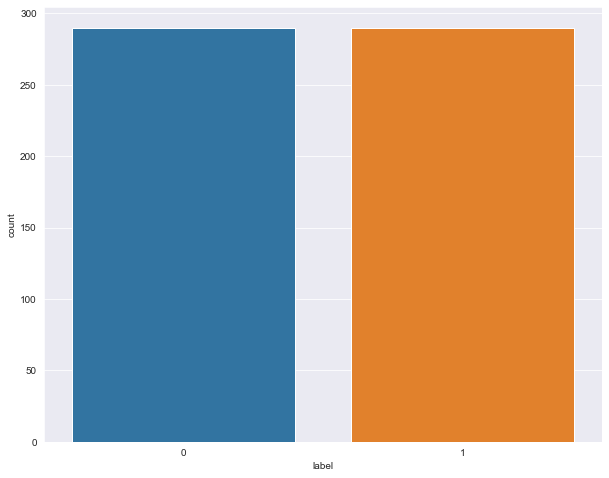

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.countplot(x='label',data=data)

In [41]:
X = data.drop('label',axis=1)
y = data.label

In [42]:
print(X.shape,y.shape)


(580, 1) (580,)


In [43]:
voc_size = 5000
messages = X.copy()
##Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
messages.reset_index(inplace = True)

In [44]:
messages

,index,text
0,0,kimkardashianchangedpasswordkanyewestusedphone...
1,1,birdboxchallenge : mancrashesattemptingdrivebl...
2,2,humanskilledlaboratory + producingmilitarizeda...
3,3,bartsimpsonelectedmayortown + thesimpsonsstarn...
4,4,jadensmithsaysprophetgodinspirednewfashionline...
...,...,...
575,575,machinelearningopensnewwayshelpdisabledpeople ...
576,576,youtubeautomatessoundeffectcaptionsai +++ yout...
577,577,solar - poweredkin couldmakeprostheticsreal ++...
578,578,uberself - drivingcartestsresumethreedayscrash...


In [45]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
one_hot_lbls

[[3493, 1347, 1379, 1086, 4274],
 [1495, 2302, 2888, 4762, 4459, 420, 4335, 3719, 752, 1744],
 [402,
  2186,
  3481,
  590,
  3355,
  4143,
  3637,
  3426,
  4623,
  639,
  179,
  3201,
  2013,
  4117,
  601,
  3679,
  4153,
  2603],
 [2606, 1136, 3826, 3167, 3407, 4561, 4970, 906, 4426],
 [697,
  3842,
  1928,
  1294,
  3225,
  4241,
  149,
  825,
  504,
  659,
  3233,
  1752,
  2021,
  4521,
  181,
  2412,
  705,
  4521,
  3860,
  3921,
  4521,
  562,
  2184],
 [4809, 4920, 2002, 405, 1352, 70, 1165, 4442],
 [4350,
  1899,
  2099,
  490,
  4815,
  3831,
  4447,
  3657,
  533,
  4472,
  1507,
  555,
  2351,
  4631,
  3339,
  764],
 [4246,
  4106,
  2394,
  414,
  770,
  2500,
  987,
  1474,
  3167,
  1271,
  373,
  678,
  2415,
  2636,
  3435,
  2853,
  3740,
  1766,
  4675,
  3167,
  3644,
  2779,
  1126,
  2318,
  4877,
  4913,
  3588,
  1594,
  4003,
  2471,
  818,
  2120,
  4181,
  2864,
  544,
  1054,
  3717,
  2107,
  1722,
  4753,
  2788,
  4343,
  1677,
  786,
  2894,
  3486,


In [51]:
Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
print(Embedded_len)

[[   0    0    0 ... 1379 1086 4274]
 [   0    0    0 ... 3719  752 1744]
 [   0    0  402 ... 3679 4153 2603]
 ...
 [   0    0    0 ... 2504 4689 2186]
 [   0    0    0 ... 1438 3184  298]
 [   0    0    0 ... 2000 3761 2463]]


In [47]:
embedding_vector_features=40
model=Sequential(name='LSTM')
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
X_final = np.array(Embedded_len)
y_final = np.array(y)

In [53]:
X_final.shape,y_final.shape

((580, 20), (580,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [55]:
model_fit =  model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
7/7 [==============================] - 4s 130ms/step - loss: 0.6904 - accuracy: 0.5155 - val_loss: 0.6824 - val_accuracy: 0.6146
Epoch 2/10
7/7 [==============================] - 0s 34ms/step - loss: 0.6825 - accuracy: 0.6804 - val_loss: 0.6798 - val_accuracy: 0.7292
Epoch 3/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6693 - accuracy: 0.7036 - val_loss: 0.6580 - val_accuracy: 0.6562
Epoch 4/10
7/7 [==============================] - 0s 31ms/step - loss: 0.6448 - accuracy: 0.6392 - val_loss: 0.6303 - val_accuracy: 0.6510
Epoch 5/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6007 - accuracy: 0.6804 - val_loss: 0.6112 - val_accuracy: 0.7292
Epoch 6/10
7/7 [==============================] - 0s 35ms/step - loss: 0.5322 - accuracy: 0.7577 - val_loss: 0.5687 - val_accuracy: 0.7448
Epoch 7/10
7/7 [==============================] - 0s 49ms/step - loss: 0.4732 - accuracy: 0.8041 - val_loss: 0.5805 - val_accuracy: 0.7031
Epoch 8/10
7/7 [==========

In [56]:
results = model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.6092 - accuracy: 0.6979


Bidirectional LSTM

In [57]:
embedding_vector_features=40
model2=Sequential(name='BiLSTM')
model2.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "BiLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
______________________________________________________

In [58]:
model2_fit =  model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
7/7 [==============================] - 5s 166ms/step - loss: 0.6923 - accuracy: 0.4923 - val_loss: 0.6868 - val_accuracy: 0.5990
Epoch 2/10
7/7 [==============================] - 0s 39ms/step - loss: 0.6855 - accuracy: 0.5902 - val_loss: 0.6810 - val_accuracy: 0.7292
Epoch 3/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6741 - accuracy: 0.7036 - val_loss: 0.6750 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 0s 59ms/step - loss: 0.6446 - accuracy: 0.7345 - val_loss: 0.6321 - val_accuracy: 0.5938
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: 0.6202 - accuracy: 0.6392 - val_loss: 0.6872 - val_accuracy: 0.4792
Epoch 6/10
7/7 [==============================] - 0s 60ms/step - loss: 0.5786 - accuracy: 0.5851 - val_loss: 0.6097 - val_accuracy: 0.7188
Epoch 7/10
7/7 [==============================] - 0s 51ms/step - loss: 0.3838 - accuracy: 0.8402 - val_loss: 1.1110 - val_accuracy: 0.6667
Epoch 8/10
7/7 [==========

In [59]:
results2 = model2.evaluate(X_test,y_test)

6/6 [==============================] - 1s 8ms/step - loss: 1.9330 - accuracy: 0.5677


Bar Graph of Accuracies


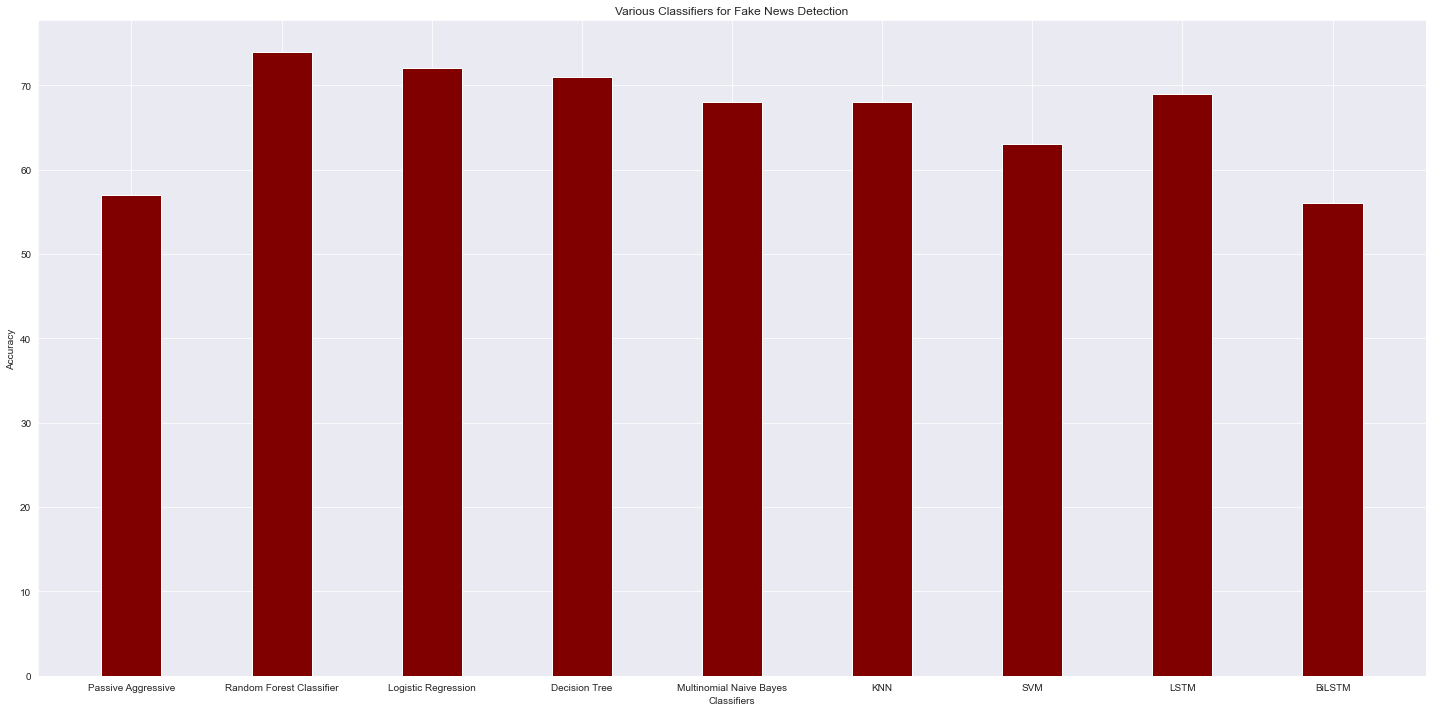

In [65]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Passive Aggressive':57, 'Random Forest Classifier':74, 'Logistic Regression':72,
        'Decision Tree':71,'Multinomial Naive Bayes':68,'KNN':68,'SVM':63,'LSTM':69,'BiLSTM':56}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Various Classifiers for Fake News Detection")
plt.show()